In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = {'EVE': {'my_mcc': {'COL2A1': 0.858,
                       'COL4A3': 0.808,
                       'COL4A5': 0.918,
                       'WFS1': 0.614,
                       'SLC26A4': 0.51,
                       'MYO7A': 0.523,
                       'FGFR1': 0.56,
                       'GJB2': 0.573},
        'tool_mcc': {'COL2A1': 0.846,
                       'COL4A3': 0.672,
                       'COL4A5': 0.916,
                       'WFS1': 0.676,
                       'SLC26A4': 0.523,
                       'MYO7A': 0.523,
                       'FGFR1': 0.604,
                       'GJB2': 0.526}},
        
        
        'am': {'my_mcc':{'COL2A1': 0.876,
                       'COL4A3': 0.811,
                       'COL4A5': 0.926,
                       'WFS1': 0.689,
                       'SLC26A4': 0.605,
                       'MYO7A': 0.561,
                       'FGFR1': 0.613,
                       'GJB2': 0.583},
             'tool_mcc': {'COL2A1': 0.813,
                       'COL4A3': 0.735,
                       'COL4A5': 0.926,
                       'WFS1': 0.68,
                       'SLC26A4': 0.659,
                       'MYO7A': 0.459,
                       'FGFR1': 0.593,
                       'GJB2': 0.66}},
        

          'Mutpred': {'my_mcc':{'COL2A1': 0.902,
                       'COL4A3': 0.862,
                       'COL4A5': 0.929,
                       'WFS1': 0.752,
                       'SLC26A4': 0.648,
                       'MYO7A': 0.613,
                       'FGFR1': 0.629,
                       'GJB2': 0.706},
             'tool_mcc': {'COL2A1': 0.784,
                       'COL4A3': 0.775,
                       'COL4A5': 0.948,
                       'WFS1': 0.716,
                       'SLC26A4': 0.648,
                       'MYO7A': 0.506,
                       'FGFR1': 0.431,
                       'GJB2': 0.701}},
        

          'REVEL': {'my_mcc':{'COL2A1': 0.898,
                       'COL4A3': 0.886,
                       'COL4A5': 0.941,
                       'WFS1': 0.802,
                       'MYO7A': 0.706,
                       'FGFR1': 0.69},
             'tool_mcc': {'COL2A1': 0.852, 
                       'COL4A3': 0.859,
                       'COL4A5': 0.93,
                       'WFS1': 0.888,
                       'MYO7A': 0.695,
                       'FGFR1': 0.81}},
        

              'VEST4': {'my_mcc':{'COL2A1': 0.909, 
                       'COL4A3': 0.882,
                       'COL4A5': 0.939,
                       'SLC26A4': 0.654,
                       'MYO7A': 0.614,
                       'FGFR1': 0.657,
                       'GJB2': 0.688},
             'tool_mcc': {'COL2A1': 0.898,
                       'COL4A3': 0.815,
                       'COL4A5': 0.957,
                       'SLC26A4': 0.901,
                       'MYO7A': 0.574,
                       'FGFR1': 0.731,
                       'GJB2': 0.825}}}

# To add another tool:
# 'tool_name': {'my_mcc':{'COL2A1': 
#                        'COL4A3': 
#                        'COL4A5': 
#                        'WFS1': 
#                        'SLC26A4': 
#                        'MYO7A': 
#                        'FGFR1': 
#                        'GJB2': },
#              '{tool}_mcc': {'COL2A1': 
#                        'COL4A3': 
#                        'COL4A5':  
#                        'SLC26A4': 
#                        'MYO7A': 
#                        'FGFR1': 
#                        'GJB2': }}


In [3]:
# Define colors for each algorithm
algorithm_colors = {'EVE': 'purple', 'am': 'r', 'REVEL': 'g', 'VEST4': 'pink', 'Mutpred': 'y' }

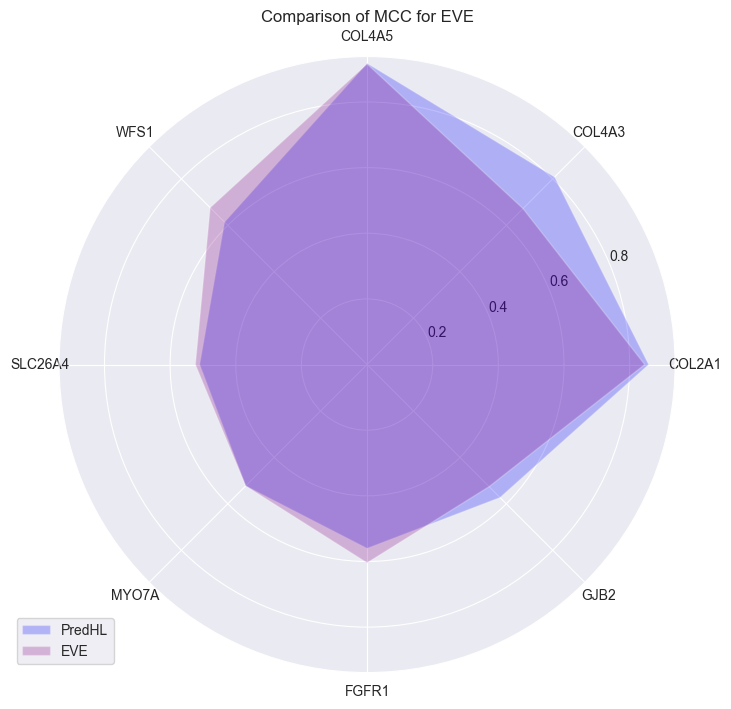

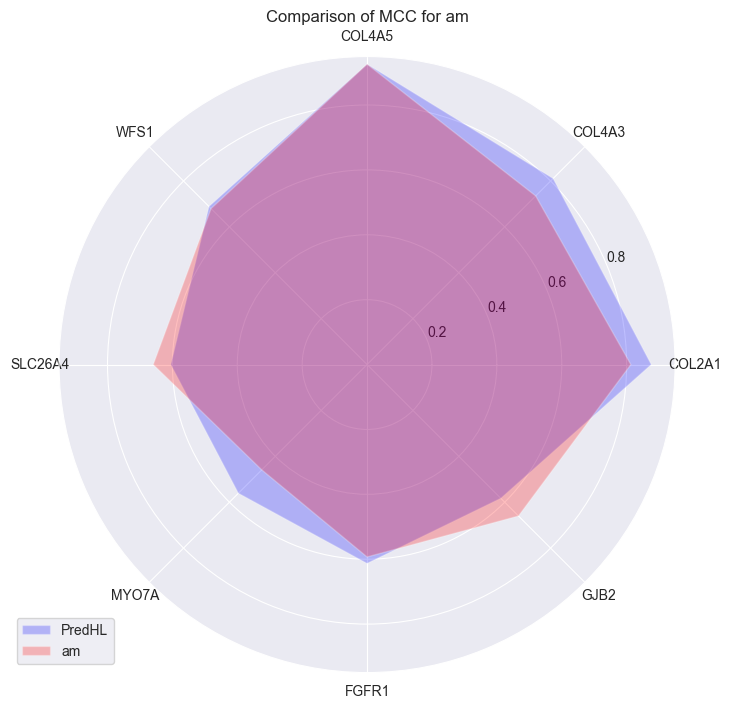

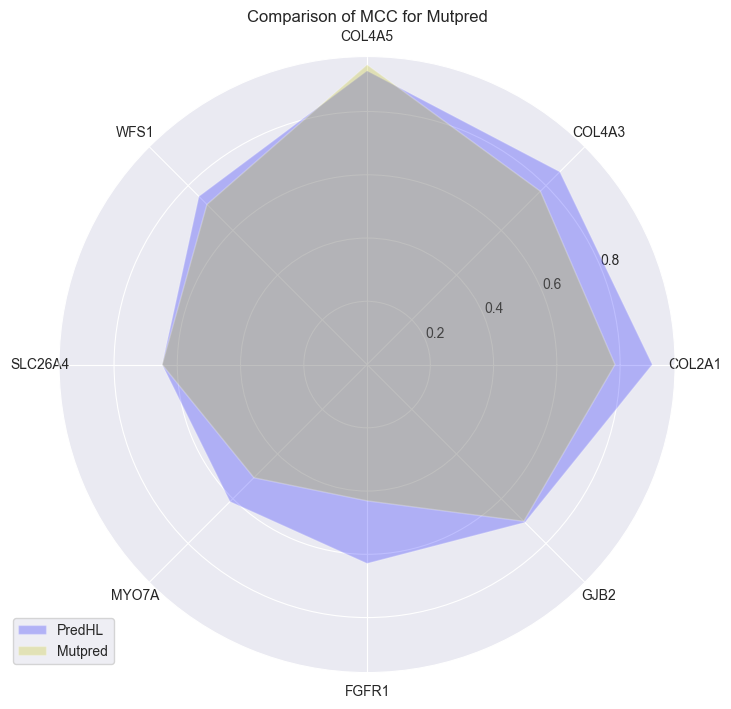

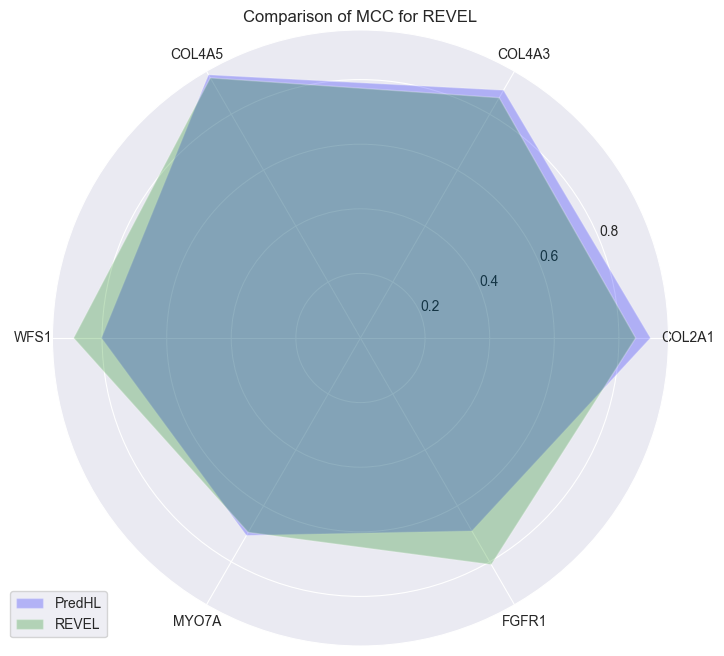

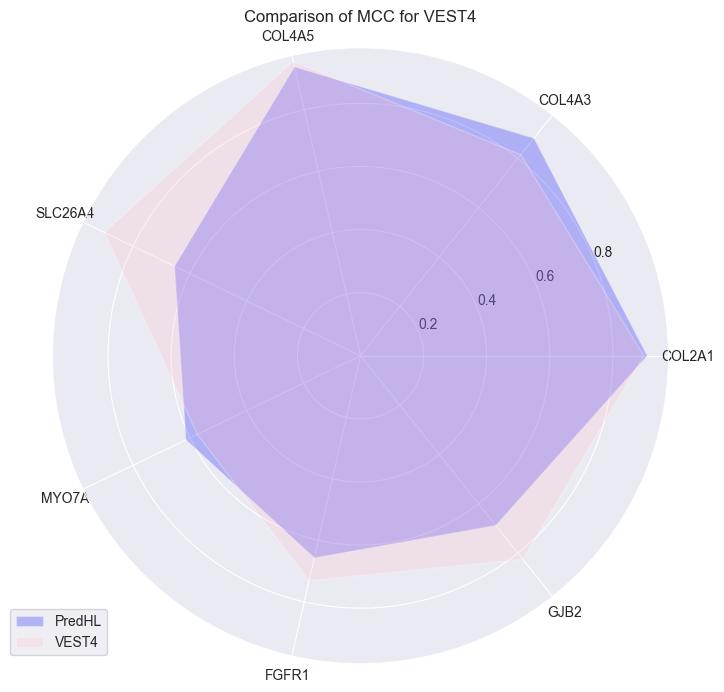

In [4]:
# Loop through the keys in the data dictionary
for algorithm, metrics_dict in data.items():
    genes = list(metrics_dict['my_mcc'].keys())
    
    # Create a DataFrame
    df = pd.DataFrame({
        'Gene': genes,
        'my_mcc': list(metrics_dict['my_mcc'].values()),
        'tool_mcc': list(metrics_dict['tool_mcc'].values())
    })

    # Set up the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    theta = np.linspace(0, 2 * np.pi, len(genes), endpoint=False)

    # Plot data for Algorithm 1
    ax.fill(theta, df['my_mcc'], 'b', alpha=0.25, label='PredHL')
    ax.set_xticks(theta)
    ax.set_xticklabels(df['Gene'])

    # Plot data for Algorithm 2
    ax.fill(theta, df['tool_mcc'], algorithm_colors[algorithm], alpha=0.25, label=f"{algorithm}")

    # Add legend and title
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(f'Comparison of MCC for {algorithm}')

    # Show the plot
    plt.show()

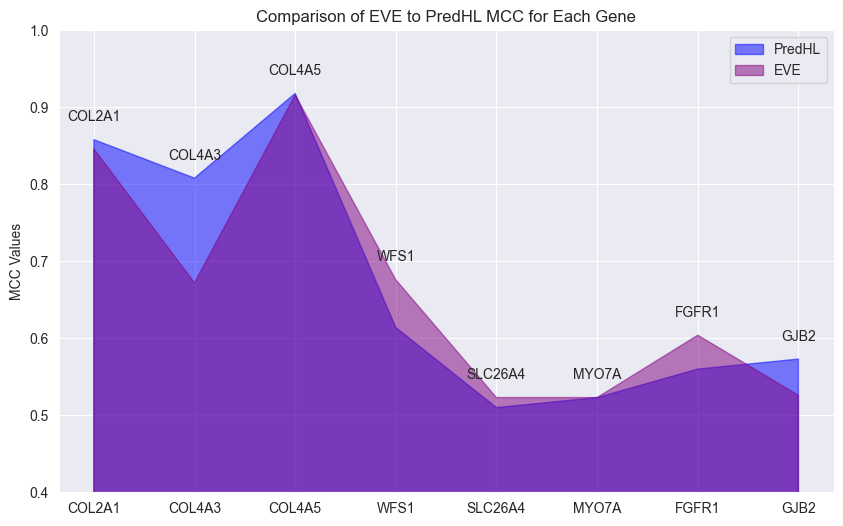

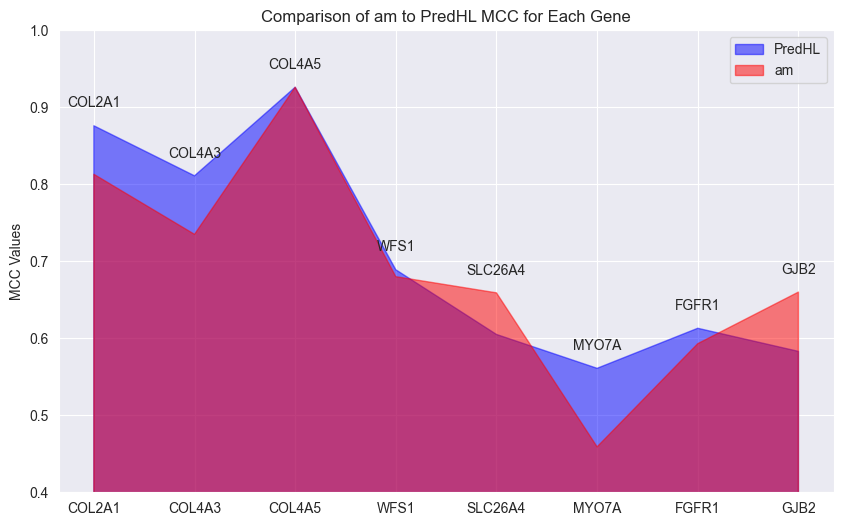

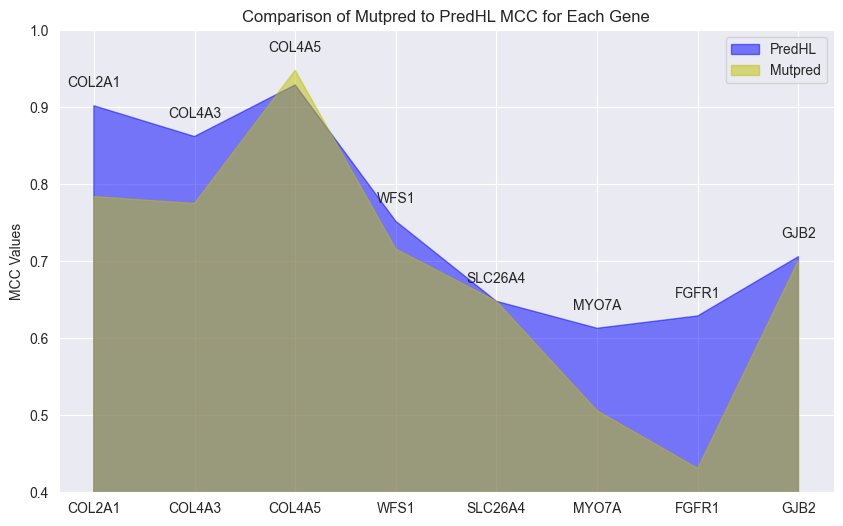

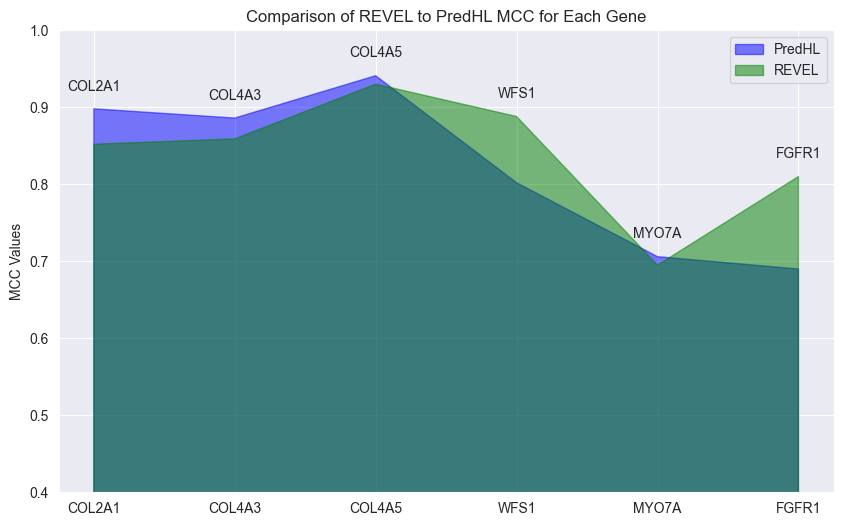

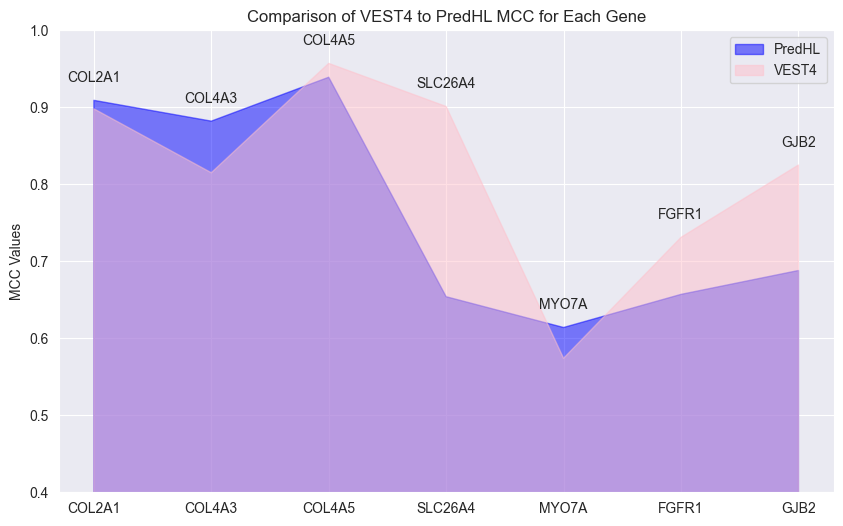

In [5]:
# Loop through the keys in the data dictionary
for algorithm, metrics_dict in data.items():
    genes = list(metrics_dict['my_mcc'].keys())
    
    # Extract MCC values for the given algorithm
    my_mcc = metrics_dict['my_mcc']
    tool_mcc = metrics_dict['tool_mcc']

    x = np.arange(len(genes))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.fill_between(x, 0, list(my_mcc.values()), alpha=0.5, label='PredHL', color='blue')
    ax.fill_between(x, 0, list(tool_mcc.values()), alpha=0.5, label=f'{algorithm}', color= algorithm_colors[algorithm])

    ax.set_xticks(x)
    ax.set_xticklabels(genes)
    ax.legend()

    # Set y-axis limits
    ax.set_ylim(0.4, 1.0)

    plt.ylabel('MCC Values')
    plt.title(f'Comparison of {algorithm} to PredHL MCC for Each Gene')

    # Annotating the top of each "mountain"
    for i, gene in enumerate(genes):
        ax.annotate(gene, (i, max(list(my_mcc.values())[i], list(tool_mcc.values())[i]) + 0.02), ha='center', va='bottom')

    plt.show()